## Creating a Neural Network to deal with the Farmer's Dataset to incresase the accuraccy of Loan Granting.

In [3]:
#IMporting Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Lets import the data
F_data = pd.read_csv('./Farmers_Database.csv')

In [5]:
#lets look at how it is structured
F_data.head()

,names of farmers,Aadhar Card,Registered on Farmer Portal,Government Scheme Beneficiary,Land Class,Land Area,Land Owners,Land Value - Crs,Soil Health,Crop Type,...,Advanced Agriculture Equipment,Mode of Harvesting,Storage Types,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,Loan Granted
0,Dihan,Yes,No,No,Small,1.00,Yes,1.359050,Medium,CottonL,...,No,Hand-Held Tools,SWC,6380.0,60.0,243180.0,344520.0,101340.0,1266804.0,No
1,Manosh,Yes,No,No,Marginal,0.95,Yes,1.291098,Medium,JowarH,...,No,Manual,SWC,2970.0,57.0,112689.0,152361.0,39672.0,4105530.0,No
2,Dipta,Yes,Yes,Yes,Medium,7.00,Yes,9.513350,Good,CottonM,...,No,Hand-Held Tools,Gramin Bhandaran,6080.0,385.0,1560405.0,2106720.0,546315.0,129492.0,Yes
3,Maladhi,Yes,Yes,Yes,Semi-Medium,2.90,Yes,4.299540,Low,Maize,...,Yes,Manual,Gramin Bhandaran,1962.0,174.0,227592.0,307249.2,79657.2,NaN,Yes
4,Janasha,No,Yes,No,Marginal,0.95,Yes,1.408470,Medium,Moong,...,No,Manual,Open Land,7755.0,57.0,294519.0,397831.5,103312.5,680904.0,No


In [6]:
F_data.tail()

,names of farmers,Aadhar Card,Registered on Farmer Portal,Government Scheme Beneficiary,Land Class,Land Area,Land Owners,Land Value - Crs,Soil Health,Crop Type,...,Advanced Agriculture Equipment,Mode of Harvesting,Storage Types,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,Loan Granted
24995,Bhavin,Yes,Yes,No,Medium,6.00,Yes,8.154300,Good,Soyabean,...,Yes,Machinery,CWC,4300.0,330.00,925650.00,1277100.0,351450.00,345492.00,Yes
24996,Yahya,No,No,No,Semi-Medium,2.00,Yes,2.718100,Good,Moong,...,No,Hand-Held Tools,Open Land,7755.0,110.00,568370.00,767745.0,199375.00,268438.50,No
24997,Navesha,Yes,No,No,Small,2.00,Yes,2.965200,Low,Mustard,...,No,Machinery,SWC,5450.0,120.00,320400.00,588600.0,268200.00,170212.50,Yes
24998,Taranghini,Yes,No,Yes,Marginal,0.95,Yes,1.408470,Low,Lentil,...,No,Hand-Held Tools,FCI,6000.0,52.25,169237.75,282150.0,112912.25,3069198.00,No
24999,Virup,Yes,No,Yes,Small,1.08,Yes,1.467774,Medium,Mustard,...,No,Manual,Gramin Bhandaran,5450.0,64.80,173016.00,317844.0,144828.00,724473.75,No


In [7]:
#Lets create a dummy of the datset, just to have a backup
dummy = F_data.copy()

In [11]:
# Lets take a look at all the Feature names in the dataset
F_data.columns
#It can be inferred that 'Loan Granted' is the Target variable, while all other columns are the features.

Index(['names of farmers', 'Aadhar Card', 'Registered on Farmer Portal',
       'Government Scheme Beneficiary', 'Land Class', 'Land Area',
       'Land Owners', 'Land Value - Crs', 'Soil Health', 'Crop Type',
       'Crop Cost - Qtl', 'Type of Farming', 'Employes', 'Irrigation Mode',
       'Advanced Agriculture Equipment', 'Mode of Harvesting', 'Storage Types',
       'MSP-Qunitol', 'Total Possible Yeild', 'Total Crop Cost',
       'Total Revenue', 'Total Profit', 'Loan Request', 'Loan Granted'],
      dtype='object')

In [9]:
#checking if there are any nan values
F_data.isnull().sum()

names of farmers                     0
Aadhar Card                          0
Registered on Farmer Portal          0
Government Scheme Beneficiary        0
Land Class                           0
Land Area                            0
Land Owners                          0
Land Value - Crs                     0
Soil Health                          0
Crop Type                            0
Crop Cost - Qtl                   1027
Type of Farming                      0
Employes                             0
Irrigation Mode                      0
Advanced Agriculture Equipment       0
Mode of Harvesting                   0
Storage Types                        0
MSP-Qunitol                       1027
Total Possible Yeild                 0
Total Crop Cost                   1027
Total Revenue                     1027
Total Profit                      1027
Loan Request                      1027
Loan Granted                         0
dtype: int64

In [12]:
#As we understand from the table, all the NAN values are numericals, so i will be filling them 
def fillna(input_col):
    input_col.fillna((np.sum(input_col))//len(input_col), inplace = True)

In [15]:
#Lets run a loop through columns, then apply the fillna function on any column that has null values
for column in F_data:
    if F_data[column].isnull().sum()>0:
        fillna(F_data[column])

In [16]:
#LEts check if it worked
F_data.isnull().sum() #Worked perfectly

names of farmers                  0
Aadhar Card                       0
Registered on Farmer Portal       0
Government Scheme Beneficiary     0
Land Class                        0
Land Area                         0
Land Owners                       0
Land Value - Crs                  0
Soil Health                       0
Crop Type                         0
Crop Cost - Qtl                   0
Type of Farming                   0
Employes                          0
Irrigation Mode                   0
Advanced Agriculture Equipment    0
Mode of Harvesting                0
Storage Types                     0
MSP-Qunitol                       0
Total Possible Yeild              0
Total Crop Cost                   0
Total Revenue                     0
Total Profit                      0
Loan Request                      0
Loan Granted                      0
dtype: int64

In [22]:
#time to perfrom one-hot-encoding to covert strings to numericals, as to ensure the dataset can be fed to the Neural network.
from collections import defaultdict
def encoder(input_column):
    data_dic = defaultdict(list)
    count=0
    for uniq in F_data[input_column].unique():
        data_dic[uniq].append(count)
        count+=1
    def solver(a,dic=data_dic):
        return dic[a][0]
    naming_system = input_column.split()
    new_name = '-'.join(naming_system)
    F_data[new_name] = F_data[input_column].apply(solver)

In [23]:
#Lets run through all the columns present in pur dataset, that have values in strings, to encode them into ints.
for column in F_data:
    if isinstance(F_data[column].iloc[0], str):
        encoder(column)
    else: continue

In [28]:
#Lets see if it worked properly
# this will help us see if new column names were added or not
print(len(F_data.columns),F_data.columns)

38 Index(['names of farmers', 'Aadhar Card', 'Registered on Farmer Portal',
       'Government Scheme Beneficiary', 'Land Class', 'Land Area',
       'Land Owners', 'Land Value - Crs', 'Soil Health', 'Crop Type',
       'Crop Cost - Qtl', 'Type of Farming', 'Employes', 'Irrigation Mode',
       'Advanced Agriculture Equipment', 'Mode of Harvesting', 'Storage Types',
       'MSP-Qunitol', 'Total Possible Yeild', 'Total Crop Cost',
       'Total Revenue', 'Total Profit', 'Loan Request', 'Loan Granted',
       'names-of-farmers', 'Aadhar-Card', 'Registered-on-Farmer-Portal',
       'Government-Scheme-Beneficiary', 'Land-Class', 'Land-Owners',
       'Soil-Health', 'Crop-Type', 'Type-of-Farming', 'Irrigation-Mode',
       'Advanced-Agriculture-Equipment', 'Mode-of-Harvesting', 'Storage-Types',
       'Loan-Granted'],
      dtype='object')


In [25]:
F_data.head()

,names of farmers,Aadhar Card,Registered on Farmer Portal,Government Scheme Beneficiary,Land Class,Land Area,Land Owners,Land Value - Crs,Soil Health,Crop Type,...,Land-Class,Land-Owners,Soil-Health,Crop-Type,Type-of-Farming,Irrigation-Mode,Advanced-Agriculture-Equipment,Mode-of-Harvesting,Storage-Types,Loan-Granted
0,Dihan,Yes,No,No,Small,1.00,Yes,1.359050,Medium,CottonL,...,0,0,0,0,0,0,0,0,0,0
1,Manosh,Yes,No,No,Marginal,0.95,Yes,1.291098,Medium,JowarH,...,1,0,0,1,1,1,0,1,0,0
2,Dipta,Yes,Yes,Yes,Medium,7.00,Yes,9.513350,Good,CottonM,...,2,0,1,2,1,2,0,0,1,1
3,Maladhi,Yes,Yes,Yes,Semi-Medium,2.90,Yes,4.299540,Low,Maize,...,3,0,2,3,2,0,1,1,1,1
4,Janasha,No,Yes,No,Marginal,0.95,Yes,1.408470,Medium,Moong,...,1,0,0,4,2,0,0,1,2,0


In [26]:
#Now that we have encoded every string to a integer value, let's drop the string containing columsn
def dropper(F_data):
    for column in F_data:
        if isinstance(F_data[column].iloc[0], str):
            F_data.drop(column,inplace=True,axis=1)

In [29]:
#Lets run the function on our dataset
dropper(F_data)

In [30]:
#To see if it worked
print(len(F_data.columns),F_data.columns) #It has worked perfectly

24 Index(['Land Area', 'Land Value - Crs', 'Crop Cost - Qtl', 'Employes',
       'MSP-Qunitol', 'Total Possible Yeild', 'Total Crop Cost',
       'Total Revenue', 'Total Profit', 'Loan Request', 'names-of-farmers',
       'Aadhar-Card', 'Registered-on-Farmer-Portal',
       'Government-Scheme-Beneficiary', 'Land-Class', 'Land-Owners',
       'Soil-Health', 'Crop-Type', 'Type-of-Farming', 'Irrigation-Mode',
       'Advanced-Agriculture-Equipment', 'Mode-of-Harvesting', 'Storage-Types',
       'Loan-Granted'],
      dtype='object')


In [31]:
#Lets look at the new Farmer_dataset
F_data.head()

,Land Area,Land Value - Crs,Crop Cost - Qtl,Employes,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,...,Land-Class,Land-Owners,Soil-Health,Crop-Type,Type-of-Farming,Irrigation-Mode,Advanced-Agriculture-Equipment,Mode-of-Harvesting,Storage-Types,Loan-Granted
0,1.00,1.359050,4053.0,0,6380.0,60.0,243180.0,344520.0,101340.0,1266804.0,...,0,0,0,0,0,0,0,0,0,0
1,0.95,1.291098,1977.0,0,2970.0,57.0,112689.0,152361.0,39672.0,4105530.0,...,1,0,0,1,1,1,0,1,0,0
2,7.00,9.513350,4053.0,1,6080.0,385.0,1560405.0,2106720.0,546315.0,129492.0,...,2,0,1,2,1,2,0,0,1,1
3,2.90,4.299540,1308.0,1,1962.0,174.0,227592.0,307249.2,79657.2,1015690.0,...,3,0,2,3,2,0,1,1,1,1
4,0.95,1.408470,5167.0,0,7755.0,57.0,294519.0,397831.5,103312.5,680904.0,...,1,0,0,4,2,0,0,1,2,0


In [33]:
#Lets look athe correlation of all columns
corr = F_data.corr()
corr

,Land Area,Land Value - Crs,Crop Cost - Qtl,Employes,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,...,Land-Class,Land-Owners,Soil-Health,Crop-Type,Type-of-Farming,Irrigation-Mode,Advanced-Agriculture-Equipment,Mode-of-Harvesting,Storage-Types,Loan-Granted
Land Area,1.000000,0.998110,0.006505,0.002526,0.005723,0.998110,0.797570,0.807844,0.800135,-0.003755,...,0.750289,-0.008628,0.001850,-0.007133,-0.004546,0.007056,0.005856,-0.006113,0.000929,0.263316
Land Value - Crs,0.998110,1.000000,0.005908,0.002031,0.005174,0.996213,0.795577,0.805917,0.798435,-0.003401,...,0.748875,-0.008424,0.000979,-0.007156,-0.004722,0.007677,0.005878,-0.005481,0.000300,0.262755
Crop Cost - Qtl,0.006505,0.005908,1.000000,0.001169,0.985123,0.006358,0.414151,0.397564,0.343127,0.008099,...,0.008816,0.001158,-0.003289,-0.389022,-0.015207,-0.010552,0.003879,-0.007721,-0.000826,0.174048
Employes,0.002526,0.002031,0.001169,1.000000,0.000923,0.001794,0.002494,0.002415,0.002135,0.012363,...,0.005684,0.011324,0.006115,0.000843,0.005786,-0.013208,-0.000348,0.002382,-0.007844,-0.084771
MSP-Qunitol,0.005723,0.005174,0.985123,0.000923,1.000000,0.005644,0.407435,0.402748,0.375950,0.006704,...,0.008241,0.002692,-0.003763,-0.338970,-0.015155,-0.009132,0.004962,-0.007824,0.000806,0.172482
Total Possible Yeild,0.998110,0.996213,0.006358,0.001794,0.005644,1.000000,0.798969,0.809383,0.801939,-0.003646,...,0.748966,-0.008486,0.002125,-0.007265,-0.004854,0.006322,0.005479,-0.005640,0.001023,0.263909
Total Crop Cost,0.797570,0.795577,0.414151,0.002494,0.407435,0.798969,1.000000,0.995011,0.944228,0.003418,...,0.598899,-0.003769,0.002144,-0.164109,-0.009930,-0.002343,0.008338,-0.008068,0.001559,0.283949
Total Revenue,0.807844,0.805917,0.397564,0.002415,0.402748,0.809383,0.995011,1.000000,0.972369,0.002872,...,0.606477,-0.003567,0.002133,-0.139963,-0.009883,-0.001824,0.007915,-0.008091,0.001949,0.285762
Total Profit,0.800135,0.798435,0.343127,0.002135,0.375950,0.801939,0.944228,0.972369,1.000000,0.001482,...,0.600374,-0.002955,0.002023,-0.077959,-0.009384,-0.000539,0.006615,-0.007827,0.002787,0.278772
Loan Request,-0.003755,-0.003401,0.008099,0.012363,0.006704,-0.003646,0.003418,0.002872,0.001482,1.000000,...,-0.003901,0.002388,0.013089,-0.011063,0.001858,-0.003311,0.004830,-0.010501,-0.002389,-0.283901


<AxesSubplot:title={'center':'Data Correlation'}>

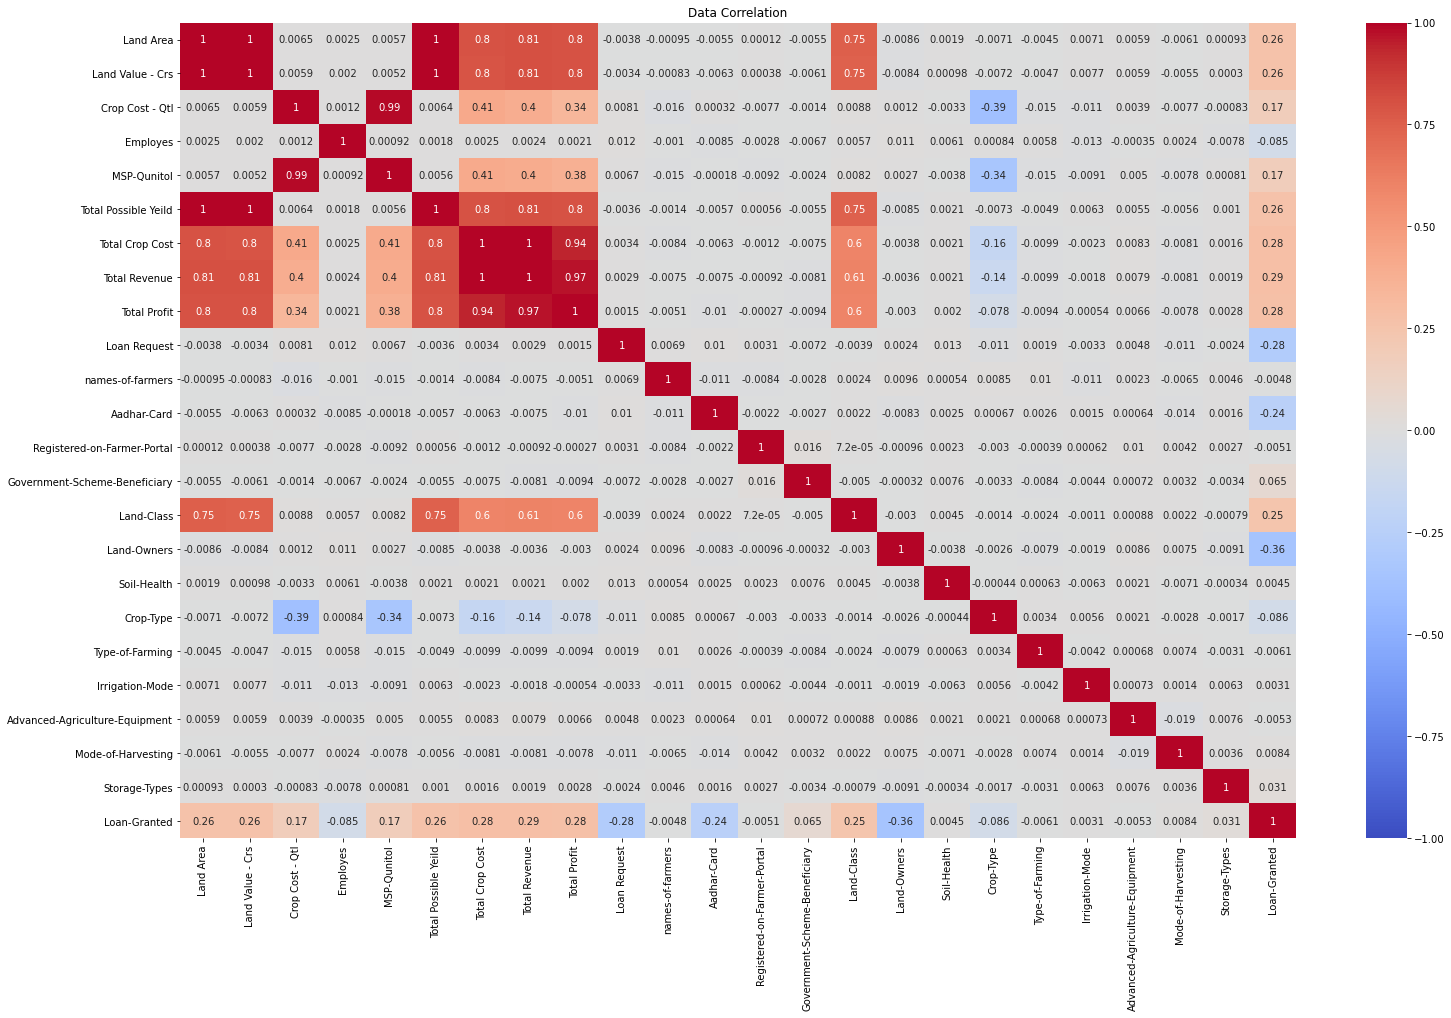

In [34]:
#Lets visualize this correlation using a heatmap
import seaborn as sns
plt.figure(figsize=(25,15))
plt.title('Data Correlation')
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [35]:
#as we can infer from the visualization, the names-of-farmers column is not valuable or contibuting anything so, i am dropping it
F_data.drop('names-of-farmers',inplace=True,axis=1)

## Data Splitting

In [37]:
#now its time to split the dataset into Features and Target
X = F_data.drop('Loan-Granted',axis=1)
Y = F_data['Loan-Granted']

In [38]:
#now its time to split the X,Y dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [40]:
#Lets look at the split size
print(len(x_train),len(x_test))

18750 6250


In [41]:
#Lets look at x_train
x_train.head()

,Land Area,Land Value - Crs,Crop Cost - Qtl,Employes,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,...,Government-Scheme-Beneficiary,Land-Class,Land-Owners,Soil-Health,Crop-Type,Type-of-Farming,Irrigation-Mode,Advanced-Agriculture-Equipment,Mode-of-Harvesting,Storage-Types
7091,3.9,5.300295,2805.0,2,4300.0,214.5,601672.5,830115.00,228442.50,2139984.00,...,1,3,1,2,7,3,0,0,2,0
13982,2.5,3.397625,5167.0,0,7755.0,137.5,710462.5,959681.25,249218.75,4686330.00,...,1,3,0,1,4,2,0,0,0,1
9532,0.9,1.334340,1065.0,0,2125.0,54.0,57510.0,103275.00,45765.00,297619.20,...,0,1,0,1,19,2,0,0,1,4
5224,2.0,2.965200,1065.0,1,2125.0,120.0,127800.0,229500.00,101700.00,1246050.00,...,0,3,0,2,19,1,0,0,1,1
14449,0.8,1.186080,3206.0,2,5335.0,44.0,141064.0,211266.00,70202.00,624813.75,...,1,1,0,0,10,2,2,0,1,0


In [42]:
#Lets look at x_test
x_test.head()

,Land Area,Land Value - Crs,Crop Cost - Qtl,Employes,MSP-Qunitol,Total Possible Yeild,Total Crop Cost,Total Revenue,Total Profit,Loan Request,...,Government-Scheme-Beneficiary,Land-Class,Land-Owners,Soil-Health,Crop-Type,Type-of-Farming,Irrigation-Mode,Advanced-Agriculture-Equipment,Mode-of-Harvesting,Storage-Types
11505,3.90,5.300295,157.0,2,315.0,214.5,33676.5,60810.75,27134.25,489600.00,...,0,3,0,0,22,2,0,0,1,5
8026,11.00,16.308600,3873.0,1,5850.0,660.0,2556180.0,3474900.00,918720.00,139497.12,...,0,4,1,1,15,2,1,1,1,0
16555,1.08,1.601208,3873.0,2,5850.0,64.8,250970.4,341172.00,90201.60,76041.00,...,0,0,0,1,15,0,2,0,1,2
12889,4.00,5.930400,1977.0,2,2970.0,220.0,434940.0,588060.00,153120.00,2728176.00,...,1,2,0,2,1,3,1,1,2,3
15487,0.95,1.291098,2670.0,2,5450.0,57.0,152190.0,279585.00,127395.00,151121.88,...,1,1,0,1,12,0,0,0,2,2


## Neural Network Creation

In [52]:
##Importing required libraries
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [56]:
# Create a Sequential model
model = Sequential()

# Input layer (based on 22 features/columns from the dataframe)
input_layer = Input(shape=(22,))

# Six dense layers
dense1 = Dense(units=64, activation='relu')(input_layer)
dense2 = Dense(units=128, activation='relu')(dense1)
dense3 = Dense(units=256, activation='relu')(dense2)
dense4 = Dense(units=256, activation='relu')(dense3)
dense5 = Dense(units=256, activation='relu')(dense4)
dense6 = Dense(units=256, activation='relu')(dense5)

# Output layer
output_layer = Dense(units=1, activation='sigmoid')(dense6)

# Construct the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (assuming binary classification)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_18 (Dense)            (None, 64)                1472      
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               6579

In [59]:
#Time to train the neural network
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.6619
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6407 - accuracy: 0.6619
Epoch 3/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6405 - accuracy: 0.6619
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6406 - accuracy: 0.6619
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.6619
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6406 - accuracy: 0.6619
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.6619
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6402 - accuracy: 0.6619
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.6619
Epoch 10/10
586/586 [==============================] - 1s 2ms/step - loss: 0.6405 - accuracy: 0.6619

In [61]:
#Now that we are stuck at only 66.19% accuraccy. I am going to try standard scaler to imporove acuracy
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
#Lets run our neural network using the scaled vales
model.fit(x_train_scaled,y_train,epochs=10,batch_size=32)

Epoch 1/10
586/586 [==============================] - 2s 2ms/step - loss: 0.3109 - accuracy: 0.8635
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2191 - accuracy: 0.9160
Epoch 3/10
586/586 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9284
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.1341 - accuracy: 0.9508
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9594
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9616
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9650
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9656
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9691
Epoch 10/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9599

In [66]:
# As theres beter accuracy after scaling. Let's see the test prediction scores
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

196/196 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9525
Test Loss: 0.11265601217746735
Test Accuracy: 0.9524800181388855


In [67]:
#As 95% is a good accuraccy to obtain, I will no be saving the predicted values
Loan_preds = model.predict(x_test_scaled)

196/196 [==============================] - 0s 1ms/step


In [68]:
#Lets take a look at our predicted values
Loan_preds

array([[3.7040394e-05],
       [0.0000000e+00],
       [1.0341342e-03],
       ...,
       [9.9990559e-01],
       [9.9995244e-01],
       [2.6423329e-01]], dtype=float32)

In [75]:
Loan_yn = (Loan_preds > 0.5).astype(int)
Loan_yn = pd.DataFrame(Loan_yn)
Loan_yn

,0
0,0
1,0
2,0
3,0
4,0
...,...
6245,0
6246,0
6247,1
6248,1


In [78]:
#Let's  decode the 0,1 outputs into yes and no's
def decoder(preds):
    if preds == 1: return 'No'
    else: return 'Yes'
Loan_yn['Loan_Granted'] = Loan_yn[0].apply(decoder)

In [79]:
#Lets take a look at decoded predictions
Loan_yn

,0,Loan_Granted
0,0,Yes
1,0,Yes
2,0,Yes
3,0,Yes
4,0,Yes
...,...,...
6245,0,Yes
6246,0,Yes
6247,1,No
6248,1,No


In [80]:
#time to drop the first column
Loan_yn.drop(0,axis=1,inplace=True)

In [85]:
#Saving the Predictions
Loan_yn.to_csv('./E&Y - Model/Loan_Predictions_with_NN.csv',index=False)

In [86]:
#Saving the model
model.save('Loan_granter.h5')

In [87]:
#Saving just the weights of the model
model.save_weights('Loan_granter_weights.h5')